<a href="https://colab.research.google.com/github/Rodo2005/transfer_learning_python/blob/main/2_simpsons_augmented.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con redes neuronales convolucionales (CNN)

Ejemplo de clasificación utilizando redes neuronales convolucionales para la clasificación de imagenes<br>

v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
from keras.utils import to_categorical

from glob import glob
import matplotlib.image as mpimg

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

### `Simpsons dataset`:
El dataset **`Simpsons`** contiene 550Mbytes de imagenes a color de los personajes de los Simpsons (42 personajes). Cada imagen es de tiene al rededor de 500x450 píxeles a color (3 canales).<br> [Dataset source](https://www.kaggle.com/paultimothymooney/zipfiles)

In [2]:
# Descargar el dataset
import gdown
if os.access('simpsons_dataset_reducido', os.F_OK) is False:
    if os.access('simpsons_dataset_reducido.zip', os.F_OK) is False:
        url = 'https://drive.google.com/uc?id=1AXZzurDMFpC2eb5xu7dpiFk9RkHsNFem'
        output = 'simpsons_dataset_reducido.zip'
        gdown.download(url, output, quiet=False)
    !unzip -q simpsons_dataset_reducido.zip
else:
    print("El archivo ya se encuentra descargado")

Downloading...
From: https://drive.google.com/uc?id=1AXZzurDMFpC2eb5xu7dpiFk9RkHsNFem
To: /content/simpsons_dataset_reducido.zip
48.4MB [00:00, 146MB/s]


In [3]:
# Visualizar los directiorios o tipos de personas
os.listdir("./simpsons_dataset_reducido")

['validation', 'train']

In [4]:
 # Visualizar los tipos de personajes
 train_dir = "./simpsons_dataset_reducido/train"
 validation_dir = "./simpsons_dataset_reducido/validation"
 os.listdir(train_dir)

['abraham_grampa_simpson',
 'troy_mcclure',
 'disco_stu',
 'agnes_skinner',
 'nelson_muntz',
 'comic_book_guy',
 'chief_wiggum',
 'sideshow_bob',
 'otto_mann',
 'lionel_hutz',
 'ralph_wiggum',
 'bart_simpson',
 'sideshow_mel',
 'barney_gumble',
 'mayor_quimby',
 'charles_montgomery_burns',
 'krusty_the_clown',
 'ned_flanders',
 'lisa_simpson',
 'moe_szyslak',
 'gil',
 'patty_bouvier',
 'edna_krabappel',
 'waylon_smithers',
 'milhouse_van_houten',
 'marge_simpson',
 'homer_simpson',
 'lenny_leonard',
 'groundskeeper_willie',
 'principal_skinner',
 'maggie_simpson',
 'cletus_spuckler',
 'fat_tony',
 'apu_nahasapeemapetilon',
 'miss_hoover',
 'selma_bouvier',
 'snake_jailbird',
 'carl_carlson',
 'kent_brockman',
 'rainier_wolfcastle',
 'professor_john_frink',
 'martin_prince']

In [5]:
personajes = os.listdir(train_dir)
print("Cantidad de tipos de personaejs:", len(personajes))

Cantidad de tipos de personaejs: 42


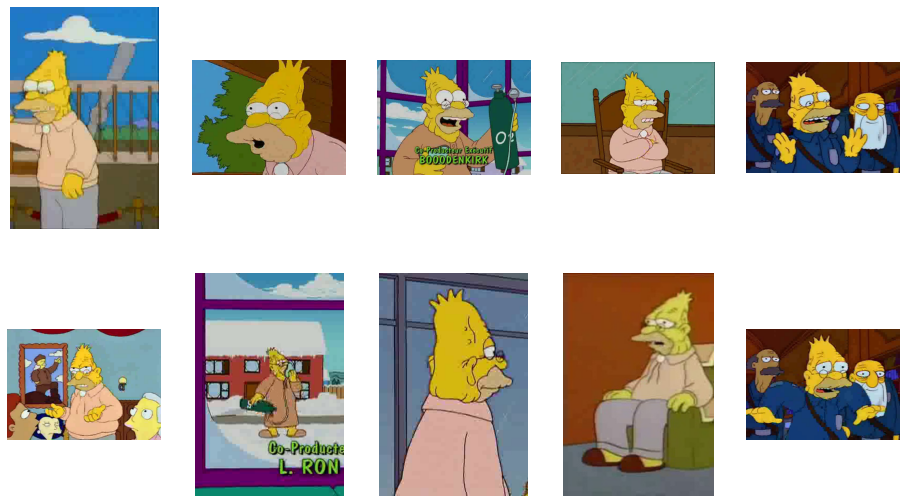

In [6]:
# Visualizar las 10 primeras imagenes de un personaje
files = glob(train_dir + "/" + personajes[0] + "/**.jpg")

fig = plt.figure(figsize=(16,9))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.axis('off')
    img = mpimg.imread(files[i])
    plt.imshow(img)
plt.show()

In [7]:
# Visualizar la dimension de la primera imagen
img = mpimg.imread(files[0])
img.shape

(480, 320, 3)

In [8]:
# Visualizar como están representados los pixeles
print(img[85, 100:110, :])

[[ 34 121 190]
 [ 34 121 190]
 [ 34 121 190]
 [ 34 121 190]
 [ 34 121 190]
 [ 34 121 190]
 [ 34 121 190]
 [ 34 121 190]
 [ 34 121 190]
 [ 34 121 190]]


#### Conclusiones
- Las imagenes tienen tamaño variable, utilizaremos un tamaño reducido para que todas las imagenes sean iguales (se elije 150x150)
- Las imagenes están representadas de 0 a 255, hay que normalizarlas

Cantidad de abraham : 40


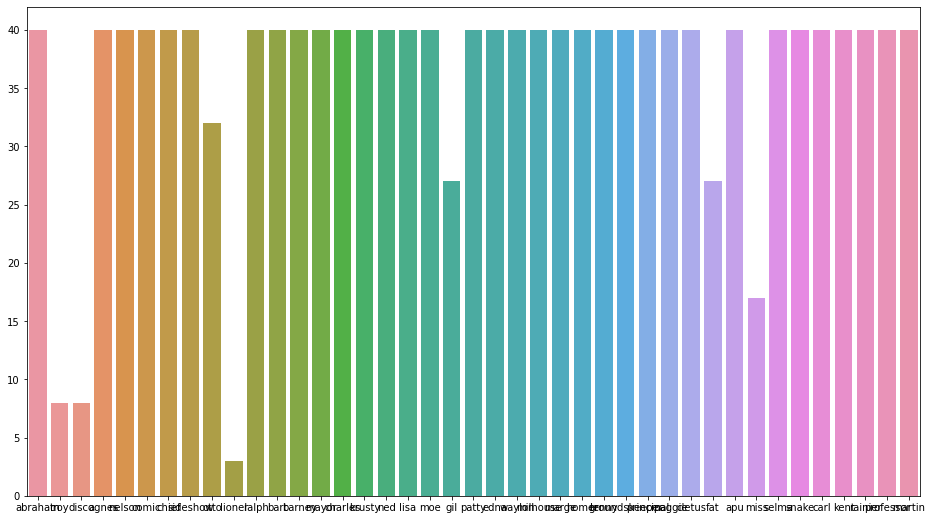

In [9]:
# Analizar cuantos personajes hay de cada uno
nombre_personajes = []
cantidad_personajes = []
for personaje in personajes:
    nombre_personaje = personaje.split("_")[0]
    files = glob(train_dir + "/" + personaje + "/**.jpg")
    nombre_personajes.append(nombre_personaje)
    cantidad_personajes.append(len(files))

print("Cantidad de", nombre_personajes[0], ":", cantidad_personajes[0])
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot()
sns.barplot(x=nombre_personajes, y=cantidad_personajes, ax=ax)
plt.show()

Se puede ver que el dataset está bastante balanceado

In [10]:
# Descargar datos de test
if os.access('simpsons_test', os.F_OK) is False:
    if os.access('simpsons_test.zip', os.F_OK) is False:
        if platform.system() == 'Windows':
            !curl https://github.com/InoveAlumnos/dataset_analytics_python/raw/master/simpsons_test.zip > simpsons_test.zip
        else:
            !wget simpsons_test.zip https://github.com/InoveAlumnos/dataset_analytics_python/raw/master/simpsons_test.zip
    !unzip -q simpsons_test.zip
else:
    print("El archivo ya se encuentra descargado")

--2021-02-27 01:18:10--  http://simpsons_test.zip/
Resolving simpsons_test.zip (simpsons_test.zip)... failed: Name or service not known.
wget: unable to resolve host address ‘simpsons_test.zip’
--2021-02-27 01:18:10--  https://github.com/InoveAlumnos/dataset_analytics_python/raw/master/simpsons_test.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/simpsons_test.zip [following]
--2021-02-27 01:18:10--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/simpsons_test.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 

# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [11]:
from keras.preprocessing.image import ImageDataGenerator

# Crear un generador, indicando si deseamos realizar un escalado de la imagen
# y agregando deformación (data augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,   # Normalización
    rotation_range=40, # Rotación -40º a 40º
    width_shift_range=0.2, # Desplazamiento horizontal
    height_shift_range=0.2, # Desplazamiento vertical
    shear_range=0.2, # Ángulo de corte
    zoom_range=0.2,  # Zoom
    horizontal_flip=True) # Espejar la imagen

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        directory=train_dir,
        target_size=(150, 150),
        batch_size=140,
        class_mode="categorical")

validation_generator = validation_datagen.flow_from_directory(
        directory=validation_dir,
        target_size=(150, 150),
        batch_size=80,
        class_mode="categorical")

index_to_classes = dict(zip(train_generator.class_indices.values(), train_generator.class_indices.keys()))


Found 1522 images belonging to 42 classes.
Found 323 images belonging to 42 classes.


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [12]:
# El generador "train_generator" se lo puede utilizar para acceder a los datos
# de a cantidad batch de imagenes. En este caso el generador me retornará
# la primera vez las primeras 20 imagenes
# El generador devuelve las imagenes (X) y las clases(personaes) a las que
# pertenece (y)
# X, y = train_generator.next()
batch_imagenes, batch_clases = train_generator.next()

In [13]:
batch_imagenes.shape

(140, 150, 150, 3)

In [14]:
batch_clases.shape

(140, 42)

In [15]:
print("Cantidad de imagenes en el batch:", batch_imagenes.shape[0])
print("Dimensión de la imagen:", batch_imagenes.shape[1:])

Cantidad de imagenes en el batch: 140
Dimensión de la imagen: (150, 150, 3)


In [16]:
print("Cantidad de clases/personajes:", batch_clases.shape[1])

Cantidad de clases/personajes: 42


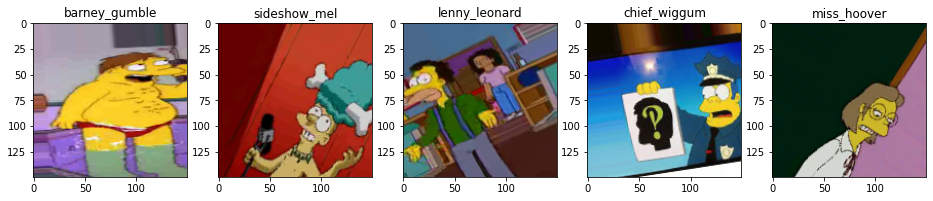

In [17]:
# Observar las primeras 5 imagenes de ese batch
fig = plt.figure(figsize=(16,9))
for i in range(5):
    ax = fig.add_subplot(1, 5, i+1)
    ax.imshow(batch_imagenes[i])
    numero_clase = batch_clases[i].argmax()
    ax.set_title(index_to_classes[numero_clase])
plt.show()

__Importante__! Luego de usar un generador "jugando", ese batch de imagenes que sacamos ya no se encontrará disponible para ser utilizado en el entrenamiento, es recomendable volver a crear los generadores si se los consumen

In [18]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        directory=train_dir,
        target_size=(150, 150),
        batch_size=140,
        class_mode="categorical")

index_to_classes = dict(zip(train_generator.class_indices.values(), train_generator.class_indices.keys()))

Found 1522 images belonging to 42 classes.


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

In [ ]:
# Los generadores ya que encargan de transformar la salida a oneHotEncoding

In [19]:
# input shape (observado del análisis de datos)
in_shape = (150, 150, 3)
in_shape

(150, 150, 3)

In [20]:
# output shape (observado del análisis de datos)
out_shape = 42
out_shape

42

In [21]:
# Debemos definir cuantas imagenes se consumiran por epoca (steps_per_epoch)
# ya que estando el generador en el medio Keras no puede saberlo por
# su cuenta
steps_per_epoch_train = len(train_generator)
steps_per_epoch_train

11

In [22]:
steps_per_epoch_validation = len(validation_generator)
steps_per_epoch_validation

5

In [23]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

model = Sequential()

# Ahora agregaremos más pares de capas CONV + POOL a fin de reducir más la
# dimensión de la imagen antes de llegar a la capa flatten
# Otra estrategia es ir aumentando la cantidad de filtros a medida que crece
# la profundidad de la red

# convolucional f=(3,3), # de filtros: 8, activación relu
# max pooling f=2, s=2
model.add(Conv2D(filters = 8, kernel_size = (3, 3), strides=1, padding='same', activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))
# convolucional f=(3,3), # de filtros: 16, activación relu
# max pooling f=2, s=2
model.add(Conv2D(filters = 16, kernel_size = (3, 3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
# convolucional f=(3,3), # de filtros: 32, activación relu
# max pooling f=2, s=2
model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
# convolucional f=(3,3), # de filtros: 64, activación relu
# max pooling f=2, s=2
model.add(Conv2D(filters = 64, kernel_size = (3, 3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
# capa flatten
model.add(Flatten())
# capa densa de 64 elementos activación relu
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(rate=0.2))
# capa densa con un output de 10 elemento con activación softmax
model.add(Dense(units=out_shape, activation='softmax'))

model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 64)        1

In [24]:
history = model.fit(
      train_generator,
      steps_per_epoch=steps_per_epoch_train,
      validation_data=validation_generator,
      validation_steps=steps_per_epoch_validation,
      epochs=30
      )

Epoch 1/30
11/11 [==============================] - 17s 986ms/step - loss: 3.7383 - accuracy: 0.0248 - val_loss: 3.7102 - val_accuracy: 0.0310
Epoch 2/30
11/11 [==============================] - 11s 1s/step - loss: 3.7168 - accuracy: 0.0315 - val_loss: 3.6533 - val_accuracy: 0.0310
Epoch 3/30
11/11 [==============================] - 11s 998ms/step - loss: 3.6844 - accuracy: 0.0313 - val_loss: 3.5823 - val_accuracy: 0.0650
Epoch 4/30
11/11 [==============================] - 11s 990ms/step - loss: 3.6374 - accuracy: 0.0601 - val_loss: 3.5443 - val_accuracy: 0.0867
Epoch 5/30
11/11 [==============================] - 11s 985ms/step - loss: 3.5949 - accuracy: 0.0604 - val_loss: 3.5187 - val_accuracy: 0.0712
Epoch 6/30
11/11 [==============================] - 11s 997ms/step - loss: 3.5552 - accuracy: 0.0717 - val_loss: 3.4218 - val_accuracy: 0.1115
Epoch 7/30
11/11 [==============================] - 11s 1s/step - loss: 3.4508 - accuracy: 0.0922 - val_loss: 3.3747 - val_accuracy: 0.1176
Epoch

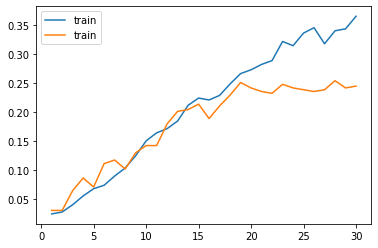

In [25]:
epoch_count = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='train')
plt.show()

In [26]:
# Predecir los datos
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        directory="./simpsons_test",
        target_size=(150, 150),
        batch_size=10,
        class_mode=None,
        shuffle=False)

y_hat_prob = model.predict(test_generator)
y_hat_prob[0]

Found 10 images belonging to 1 classes.


array([3.5480091e-01, 3.3162017e-03, 1.9712692e-04, 6.0413061e-03,
       1.0590008e-02, 9.2540157e-04, 1.4628448e-03, 5.9972852e-05,
       3.0653019e-02, 3.3581303e-03, 3.6087413e-03, 4.1495755e-02,
       2.2393768e-04, 2.1875973e-01, 7.3860446e-04, 4.0743582e-02,
       1.0466786e-04, 4.4404576e-04, 2.7719375e-03, 1.2753112e-04,
       8.7587507e-03, 6.5238066e-03, 1.2597360e-03, 4.5783751e-02,
       1.0705637e-03, 2.3725573e-03, 4.0264055e-02, 7.3239044e-04,
       3.5772227e-02, 6.2113446e-03, 1.7048763e-03, 4.5537609e-03,
       2.9677975e-03, 2.4340544e-02, 4.3631233e-02, 3.6387261e-02,
       1.1719589e-03, 2.4361907e-04, 1.3052756e-03, 6.9412496e-04,
       4.5574955e-03, 9.2694964e-03], dtype=float32)

In [27]:
y_hat = np.argmax(y_hat_prob,axis=1)
y_hat

array([ 0, 41, 30,  0, 32, 20,  0, 25, 29, 39])

In [28]:
#¿Cómo obtenemos el "y" verdadero?
test_generator.filenames

['test_images/abraham_grampa_simpson_39.jpg',
 'test_images/charles_montgomery_burns_24.jpg',
 'test_images/homer_simpson_33.jpg',
 'test_images/krusty_the_clown_17.jpg',
 'test_images/lisa_simpson_5.jpg',
 'test_images/lisa_simpson_7.jpg',
 'test_images/marge_simpson_18.jpg',
 'test_images/milhouse_van_houten_46.jpg',
 'test_images/nelson_muntz_12.jpg',
 'test_images/sideshow_bob_38.jpg']

In [29]:
# Muy rebuscada esta forma de obtener los nombres de los personajes!
# Pero en general cuando tenemos los datos de test no tenemos los nombres
# por lo que no tenemos el "y" verdadero
personajes_test = []
for file in test_generator.filenames:
    image_name = os.path.basename(file)
    image_name_split = image_name.split("_")
    personaje_name_split = image_name_split[:len(image_name_split)-1]
    personaje = personaje_name_split[0]
    for name in personaje_name_split[1:]:
        personaje += "_" + name
    personajes_test.append(personaje)
personajes_test

['abraham_grampa_simpson',
 'charles_montgomery_burns',
 'homer_simpson',
 'krusty_the_clown',
 'lisa_simpson',
 'lisa_simpson',
 'marge_simpson',
 'milhouse_van_houten',
 'nelson_muntz',
 'sideshow_bob']

In [30]:
# Obtener el "y" verdadero
y_test = [train_generator.class_indices[personaje] for personaje in personajes_test]
y_test

[0, 6, 15, 17, 20, 20, 22, 25, 29, 37]

In [31]:
# Descargar el modelo entrenado para usar en el futuro sin tener
# que volver a entrenarlo
model.save("cnn_simpsons_augmented.h5")

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [32]:
# Calcular la exactitud (accuracy)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat)

0.4

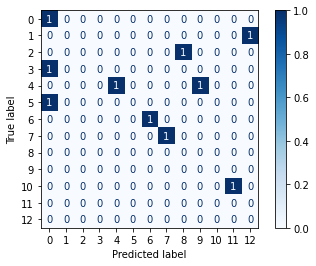

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=range(47))
cmd.plot(cmap=plt.cm.Blues)
plt.show()

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

Se utiliza el ranking de los peores 10 números clasificados con una ANN para evlauar contra este nuevo modelo de red neuronal

In [34]:
batch_test = test_generator.next()

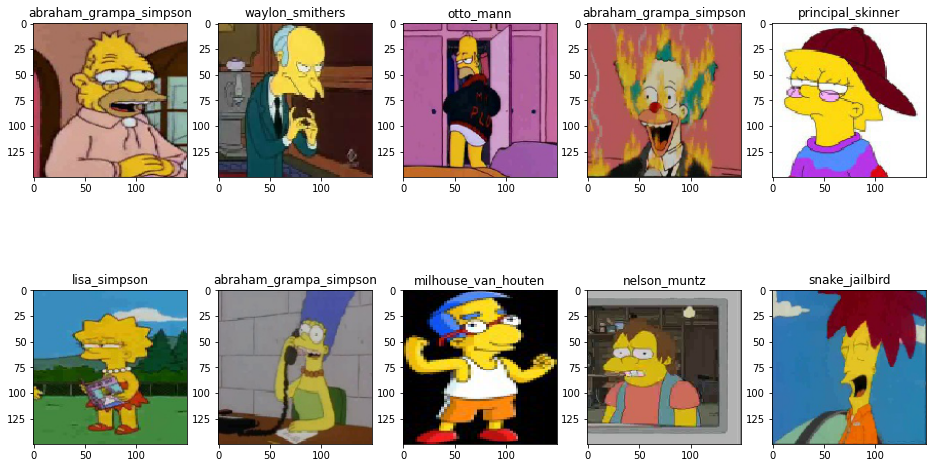

In [35]:
# Observar las primeras 5 imagenes de ese batch
fig = plt.figure(figsize=(16,9))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(batch_test[i])
    numero_clase = y_hat[i]
    ax.set_title(index_to_classes[numero_clase])
plt.show()

# Conclusión
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline7.png" width="1000" align="middle">

En el ejemplo de este notebook se puede observar que al agregar data augmentation evitamos el overfitting, los resultados del entrenamiento alcanzan a la validación pero el sistema no llega a aprender del todo las características de los personajes. Data augmentation no reemplaza del todo la falta de datos, pero es mejor que nada.